In [ ]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
from matplotlib import style
style.use('dark_background')

# Import and process the data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Course Material/Supervised Machine Learning/Autoencoders

/content/drive/MyDrive/Course Material/Supervised Machine Learning/Autoencoders


In [ ]:
import pandas as pd

data = pd.read_csv('mnist_train.csv')

data = np.array(data)
data = data[0:10000,:] # Extracting first 10000 samples
data.shape

(10000, 785)

In [ ]:
# Data without labels because Unsupervised learning
data = data[:,1:]

# Data Normalization
dataN = data / np.max(data)

# Converting to pytorch tensor
dataT = torch.tensor( dataN, dtype = torch.float32)

# Create Autoencoder Using Class

In [ ]:
class AE_Model(nn.Module):
  def __init__(self):
    super().__init__()

    self.input = nn.Linear(784,256)

    self.encoder = nn.Linear(256,64)

    self.latent = nn.Linear(64,256)

    self.decoder = nn.Linear(256,784)


  def forward(self,x):
    x = F.relu( self.input(x) )
    x = F.relu( self.encoder(x) )
    x = F.relu( self.latent(x) )
    y = torch.sigmoid( self.decoder(x) )
    return y

# Create Model Instance and Setting Parameters

In [ ]:
model = AE_Model()

lossfunc = nn.MSELoss()

optimizer = torch.optim.Adam(model.parameters(),lr=.001)

# Train the Model

In [ ]:
epochs = 10001


losses = torch.zeros(epochs)

for epoch in range(epochs):

  random_idx = np.random.choice(dataT.shape[0],size=32)
  X = dataT[random_idx,:]
  ypred = model(X)
  loss = lossfunc(ypred,X)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()


  losses[epoch] = loss.item()

  if (epoch % 1000) == 0:

      print(f' epochs : {epoch}  loss : {loss : 2.2f}')



 epochs : 0  loss :  0.23
 epochs : 1000  loss :  0.02
 epochs : 2000  loss :  0.01
 epochs : 3000  loss :  0.01
 epochs : 4000  loss :  0.01
 epochs : 5000  loss :  0.01
 epochs : 6000  loss :  0.01
 epochs : 7000  loss :  0.01
 epochs : 8000  loss :  0.01
 epochs : 9000  loss :  0.01
 epochs : 10000  loss :  0.00


# Performance Visualization

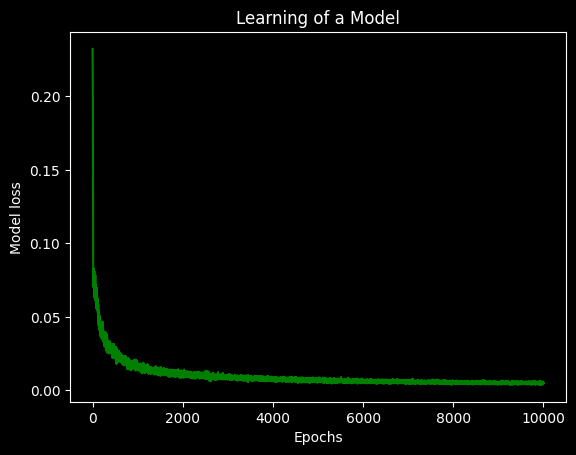

In [ ]:
plt.plot(losses, color = 'g',ls = '-')
plt.xlabel('Epochs')
plt.ylabel('Model loss')
plt.title('Learning of a Model')
plt.show()

# Add occlusion to First 7 Images

In [ ]:
import copy

X = copy.deepcopy( dataT[:7,:] )

for i in range(X.shape[0]):

  img = X[i,:].view(28,28)

  # Create occlusion on the images

  occl = np.random.choice(range(5,20)) # Generate a single value between 5 and 20

  img[occl : occl + 1, :] = 1    # This will create row wise occlusion.


# Performing De-occlusion

In [ ]:
ypred_occ = model(X)

# Visualizing Model Performance

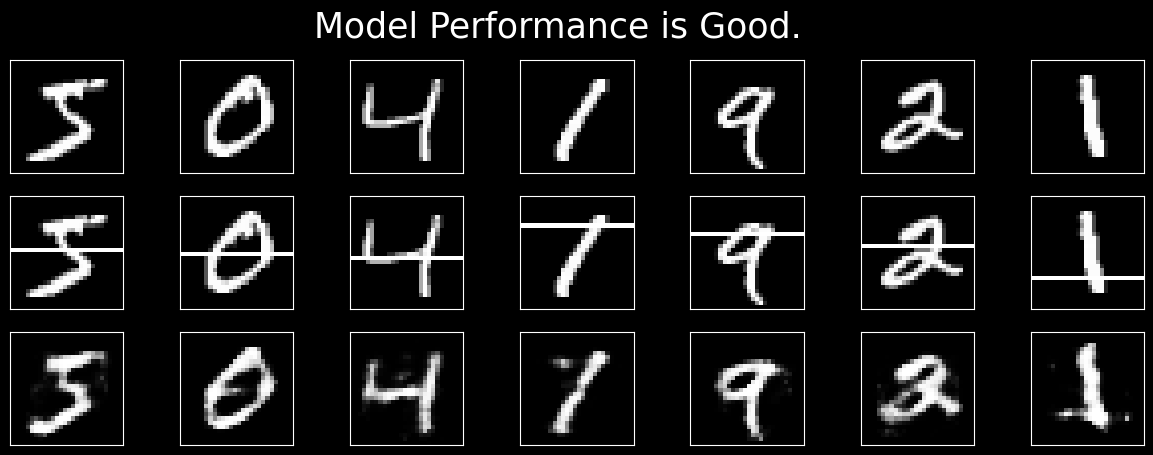

In [ ]:
fig,axes = plt.subplots(3,7,figsize=(15,5))

for i in range(7):
  axes[0,i].imshow(dataT[i,:].view(28,28).detach() ,cmap='gray')
  axes[1,i].imshow(X[i,:].view(28,28).detach() ,cmap='gray')
  axes[2,i].imshow(ypred_occ[i,:].view(28,28).detach() ,cmap='gray')
  axes[0,i].set_xticks([]), axes[0,i].set_yticks([])
  axes[1,i].set_xticks([]), axes[1,i].set_yticks([])
  axes[2,i].set_xticks([]), axes[2,i].set_yticks([])
plt.suptitle('Model Performance is Good.', fontsize = 25)
plt.show()